<center>
    <h3>University of Toronto</h3>
    <h3>Department of Mechanical and Industrial Engineering</h3>
    <h3>MIE368 Analytics in Action </h3>
    <h3>(Fall 2022)</h3>
    <hr>
    <h1>Toronto Fire Engines in Fire Station Analysis and Optimization Based on  Fire Incident</h1>
    <h3>Team 08</h3>
</center>


# Import Packages

In [ ]:
# Standard analytics packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files
import io
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler
from datetime import datetime, date

# Exploratory Data Analysis (EDA)

The first step of the EDA is to import the datasets that are used in the project to the collab file. There are three data sets used, the Incident_df_raw, the Station_df_raw and the FSA_df_raw






In [ ]:
# Import data of incident in 2016
Incident2016_df_raw = pd.read_csv('https://docs.google.com/uc?export=download&id=141-xfkh5CzGfkX2GyMNh8sm4r6y_xXS3', index_col=0)
Incident2016_df_raw = Incident2016_df_raw.reset_index(drop=True)
Incident2016_df_raw.head()

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,"44 - Trash, Rubbish Storage (inc garbage chute...",08 - Not Applicable,1 - No business interruption,0,0,500,0.0,NaN,2016-06-16 16:09:00,1 - Confined to object of origin,...,1 - No battery,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,3 - Fire with smoke showing only - including v...,2016-06-16 16:01:35,2016-06-16 16:06:58,0
1,24 - Cooking Area or Kitchen,01 - Normal (no change),1 - No business interruption,0,0,50000,1.0,NaN,2016-03-11 06:05:00,3 - Spread to entire room of origin,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2016-03-11 05:53:20,2016-03-11 05:59:03,0
2,24 - Cooking Area or Kitchen,02 - Under Renovation,1 - No business interruption,0,0,100,0.0,NaN,2016-02-23 09:16:00,1 - Confined to object of origin,...,98 - Not applicable: Alarm operated OR presenc...,1 - Battery operated,7 - Not applicable: Occupant(s) first alerted ...,"4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,9 - Undetermined,2 - Fire with no evidence from street,2016-02-23 09:07:45,2016-02-23 09:12:46,0
3,64 - Porch or Balcony,01 - Normal (no change),1 - No business interruption,0,0,5,0.0,NaN,2016-12-02 13:42:10,1 - Confined to object of origin,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,2 - Some persons (at risk) self evacuated as a...,2 - Confined to part of room/area of origin,9 - Activation/operation undetermined,9 - Undetermined,4 - Flames showing from small area (one storey...,2016-12-02 13:29:26,2016-12-02 13:33:38,0
4,42 - Garage,01 - Normal (no change),1 - No business interruption,0,0,50,0.0,NaN,2016-09-23 23:12:00,1 - Confined to object of origin,...,9 - Other reason,4 - Interconnected,9 - Undetermined,2 - Confined to part of room/area of origin,3 - Did not activate: fire too small to trigge...,2 - Partial sprinkler system present,1 - Fire extinguished prior to arrival,2016-09-23 22:57:44,2016-09-23 23:06:45,0


In [ ]:
# Import data of incident in 2017
Incident2017_df_raw = pd.read_csv('https://docs.google.com/uc?export=download&id=1jRV3FniufgJQY1U3N6pWWarWwplj12Rc', index_col=0)
Incident2017_df_raw = Incident2017_df_raw.reset_index(drop=True)
Incident2017_df_raw.head()

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),8 - Not applicable (not a business),0,0,20,0.0,NaN,2017-07-02 21:39:00,1 - Confined to object of origin,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,7 - Not applicable: Occupant(s) first alerted ...,2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2017-07-02 21:33:06,2017-07-02 21:35:59,0
1,64 - Porch or Balcony,01 - Normal (no change),8 - Not applicable (not a business),0,0,0,0.0,NaN,2017-05-11 12:50:00,1 - Confined to object of origin,...,99 - Reason for inoperation undetermined,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",2 - Confined to part of room/area of origin,9 - Activation/operation undetermined,9 - Undetermined,1 - Fire extinguished prior to arrival,2017-05-11 12:42:48,2017-05-11 12:46:42,0
2,64 - Porch or Balcony,01 - Normal (no change),8 - Not applicable (not a business),0,0,2000,0.0,NaN,2017-04-16 11:30:47,2 - Confined to part of room/area of origin,...,98 - Not applicable: Alarm operated OR presenc...,1 - Battery operated,9 - Undetermined,2 - Confined to part of room/area of origin,9 - Activation/operation undetermined,9 - Undetermined,1 - Fire extinguished prior to arrival,2017-04-16 11:22:47,2017-04-16 11:27:33,0
3,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),8 - Not applicable (not a business),0,0,500,4.0,NaN,2017-06-25 15:52:00,1 - Confined to object of origin,...,98 - Not applicable: Alarm operated OR presenc...,2 - Hardwired (standalone),2 - Some persons (at risk) self evacuated as a...,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2017-06-25 15:44:42,2017-06-25 15:47:44,0
4,"41 - Closet (eg. clothes, broom, linen closet,...",01 - Normal (no change),1 - No business interruption,0,0,10000,3.0,NaN,2017-07-25 20:30:00,2 - Confined to part of room/area of origin,...,98 - Not applicable: Alarm operated OR presenc...,4 - Interconnected,1 - All persons (at risk of injury) self evacu...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2017-07-25 20:24:24,2017-07-25 20:28:48,0


In [ ]:
# Import data of incident in 2018
Incident2018_df_raw = pd.read_csv('https://docs.google.com/uc?export=download&id=1PXlCcPwMtS2Cw8mm-8QY94yaRR7RV5PA', index_col=0)
Incident2018_df_raw = Incident2018_df_raw.reset_index(drop=True)
Incident2018_df_raw.head()

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-24 21:12:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24 21:04:29,2018-02-24 21:10:11,0
1,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-24 21:29:42,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24 21:24:43,2018-02-24 21:29:31,0
2,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25 13:29:59,2018-02-25 13:36:49,0
3,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,NaN,2018-02-25 14:19:25,1 - Confined to object of origin,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,3 - Fire with smoke showing only - including v...,2018-02-25 14:13:39,2018-02-25 14:18:07,0
4,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25 18:20:43,2018-02-25 18:26:19,0


In [ ]:
# Import data of incident in 2019
Incident2019_df_raw = pd.read_csv('https://docs.google.com/uc?export=download&id=1aRBYNa7DMVRsjwVEZt3JFRwGwscHA5QJ', index_col=0)
Incident2019_df_raw = Incident2019_df_raw.reset_index(drop=True)
Incident2019_df_raw.head()

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-18 20:18:04,2019-04-18 20:26:10,0
1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-19 10:31:06,2019-05-19 10:36:38,0
2,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-12 11:27:25,2019-06-12 11:36:29,0
3,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-11 05:56:19,2019-06-11 06:18:00,0
4,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-23 22:55:09,2019-04-23 23:01:34,0


In [ ]:
# Import data of fire station 
Station_df_raw = pd.read_csv('https://docs.google.com/uc?export=download&id=1NkT19XOgmNkTFuiPvUHr0WWzA7ejA8zR', index_col=0)
Station_df_raw = Station_df_raw.reset_index(drop=True)
Station_df_raw.head()


,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,POSTAL_CODE,...,MUNICIPALITY_NAME,OBJECTID,geometry,PUBLIC_ED_OFFICE,FIRE_OTHER,FIRE_PREV_OFFICE,TYPE_DESC,STATION,YEAR_BUILD,WARD
0,66,NaN,2575 Eglinton Ave E,330710,NaN,111065,NaN,2575,Eglinton Ave E,NaN,...,Scarborough,2048861,"{'type': 'Point', 'coordinates': (-79.25506270...",NaN,Division Commander / Platoon Chiefs,NaN,Fire Station,221.0,2014.0,20
1,63,NaN,1313 Woodbine Ave,6620011,NaN,6620012,NaN,1313,Woodbine Ave,NaN,...,East York,2062647,"{'type': 'Point', 'coordinates': (-79.31659701...",NaN,NaN,NaN,Fire Station,224.0,1950.0,19
2,52,NaN,2340 Birchmount Rd,4570660,NaN,4570662,NaN,2340,Birchmount Rd,NaN,...,Scarborough,2063805,"{'type': 'Point', 'coordinates': (-79.29911532...",NaN,NaN,NaN,Fire Station,244.0,1971.0,22
3,61,NaN,87 Main St,6294642,NaN,1140025,NaN,87,Main St,NaN,...,former Toronto,2080935,"{'type': 'Point', 'coordinates': (-79.29906526...",NaN,NaN,NaN,Fire Station,226.0,1910.0,19
4,12,NaN,143 Bond Ave,11541989,NaN,11541986,NaN,143,Bond Ave,NaN,...,North York,2108616,"{'type': 'Point', 'coordinates': (-79.34672603...",NaN,NaN,NaN,Fire Station,123.0,1956.0,16


After importing the raw data to the datasets, the team did some filterings in the columns that only numeric data will be used in the model-fitting and predictions, since some of the parameters are just descriptions and cannot be applied to the model-fitting.

In [ ]:
Incident2016_df_raw=Incident2016_df_raw[['Latitude', 'Longitude','Number_of_responding_apparatus', 'TFS_Alarm_Time']]
Incident2017_df_raw=Incident2017_df_raw[['Latitude', 'Longitude','Number_of_responding_apparatus', 'TFS_Alarm_Time']]
Incident2018_df_raw=Incident2018_df_raw[['Latitude', 'Longitude','Number_of_responding_apparatus', 'TFS_Alarm_Time']]
Incident2019_df_raw=Incident2019_df_raw[['Latitude', 'Longitude','Number_of_responding_apparatus', 'TFS_Alarm_Time']]

Station_df_raw=Station_df_raw[['ADDRESS','geometry']]



The team then count all the null tuples in the dataset and drop all the null tuples.

In [ ]:
# Check if there are missing data in dataframes
print('NaN by column for the Incident2016_df_raw:\n', Incident2016_df_raw.isnull().sum())
print('\n')
print('NaN by column for the Incident2017_df_raw:\n', Incident2017_df_raw.isnull().sum())
print('\n')
print('NaN by column for the Incident2018_df_raw:\n', Incident2018_df_raw.isnull().sum())
print('\n')
print('NaN by column for the Incident2019_df_raw:\n', Incident2019_df_raw.isnull().sum())
print('\n')
print('NaN by column for the Station_df_raw:\n', Station_df_raw.isnull().sum())

NaN by column for the Incident2016_df_raw:
 Latitude                          0
Longitude                         0
Number_of_responding_apparatus    0
TFS_Alarm_Time                    0
dtype: int64


NaN by column for the Incident2017_df_raw:
 Latitude                          0
Longitude                         0
Number_of_responding_apparatus    0
TFS_Alarm_Time                    0
dtype: int64


NaN by column for the Incident2018_df_raw:
 Latitude                          0
Longitude                         0
Number_of_responding_apparatus    0
TFS_Alarm_Time                    0
dtype: int64


NaN by column for the Incident2019_df_raw:
 Latitude                          0
Longitude                         0
Number_of_responding_apparatus    0
TFS_Alarm_Time                    0
dtype: int64


NaN by column for the Station_df_raw:
 ADDRESS     0
geometry    0
dtype: int64


In [ ]:
# Drop nan in Incident2016_df_raw
Incident2016_df_raw = Incident2016_df_raw.dropna()
Incident2016_df_raw = Incident2016_df_raw.reset_index(drop=True)
print('NaN by column for the Incident2016_df_raw:\n', Incident2016_df_raw.isna().sum())

# Drop nan in Incident2017_df_raw
Incident2017_df_raw = Incident2017_df_raw.dropna()
Incident2017_df_raw = Incident2017_df_raw.reset_index(drop=True)
print('NaN by column for the Incident2017_df_raw:\n', Incident2017_df_raw.isna().sum())

# Drop nan in Incident2018_df_raw
Incident2018_df_raw = Incident2018_df_raw.dropna()
Incident2018_df_raw = Incident2018_df_raw.reset_index(drop=True)
print('NaN by column for the Incident2018_df_raw:\n', Incident2018_df_raw.isna().sum())

# Drop nan in Incident2019_df_raw
Incident2019_df_raw = Incident2019_df_raw.dropna()
Incident2019_df_raw = Incident2019_df_raw.reset_index(drop=True)
print('NaN by column for the Incident2019_df_raw:\n', Incident2019_df_raw.isna().sum())

NaN by column for the Incident2016_df_raw:
 Latitude                          0
Longitude                         0
Number_of_responding_apparatus    0
TFS_Alarm_Time                    0
dtype: int64
NaN by column for the Incident2017_df_raw:
 Latitude                          0
Longitude                         0
Number_of_responding_apparatus    0
TFS_Alarm_Time                    0
dtype: int64
NaN by column for the Incident2018_df_raw:
 Latitude                          0
Longitude                         0
Number_of_responding_apparatus    0
TFS_Alarm_Time                    0
dtype: int64
NaN by column for the Incident2019_df_raw:
 Latitude                          0
Longitude                         0
Number_of_responding_apparatus    0
TFS_Alarm_Time                    0
dtype: int64


In [ ]:
# Convert date data as type datetime
Incident2016_df_raw['TFS_Alarm_Time']=pd.to_datetime(Incident2016_df_raw.TFS_Alarm_Time)
Incident2016_df_raw.TFS_Alarm_Time=Incident2016_df_raw.TFS_Alarm_Time.dt.round('D')
Incident2016_df_raw.index=['incident'+str(c) for c in Incident2016_df_raw.index]
print(Incident2016_df_raw.dtypes)

Incident2017_df_raw['TFS_Alarm_Time']=pd.to_datetime(Incident2017_df_raw.TFS_Alarm_Time)
Incident2017_df_raw.TFS_Alarm_Time=Incident2017_df_raw.TFS_Alarm_Time.dt.round('D')
Incident2017_df_raw.index=['incident'+str(c) for c in Incident2017_df_raw.index]
Incident2017_df_raw.dtypes

Incident2018_df_raw['TFS_Alarm_Time']=pd.to_datetime(Incident2018_df_raw.TFS_Alarm_Time)
Incident2018_df_raw.TFS_Alarm_Time=Incident2018_df_raw.TFS_Alarm_Time.dt.round('D')
Incident2018_df_raw.index=['incident'+str(c) for c in Incident2018_df_raw.index]
Incident2018_df_raw.dtypes

Incident2019_df_raw['TFS_Alarm_Time']=pd.to_datetime(Incident2019_df_raw.TFS_Alarm_Time)
Incident2019_df_raw.TFS_Alarm_Time=Incident2019_df_raw.TFS_Alarm_Time.dt.round('D')
Incident2019_df_raw.index=['incident'+str(c) for c in Incident2019_df_raw.index]
Incident2019_df_raw.dtypes

Latitude                                 float64
Longitude                                float64
Number_of_responding_apparatus             int64
TFS_Alarm_Time                    datetime64[ns]
dtype: object


Latitude                                 float64
Longitude                                float64
Number_of_responding_apparatus             int64
TFS_Alarm_Time                    datetime64[ns]
dtype: object

For the Station_df_raw table, it contains the geometric information of the Lattitude and Longittude in one column named 'geometry'. The team then used some python processes, split and attach the geometric coordinates to every incident in the Station_df.

In [ ]:
# Split 'geometry' in to 'Latitude' and 'Longitude'
Station_df_raw['Latitude']=Station_df_raw['geometry']
Station_df_raw['Longitude']=Station_df_raw['geometry']

geo = Station_df_raw.loc[:,'geometry'].tolist()
print(len(geo))
geo_edited=[]
for geometry in range(len(geo)):
  geo_edited.append(geo[geometry][34:-2])
  Station_df_raw['geometry'][geometry]=geo[geometry][34:-2]
  Station_df_raw['geometry'][geometry]=Station_df_raw['geometry'][geometry].split(',')
  Station_df_raw['Latitude'][geometry]=Station_df_raw['geometry'][geometry][1]
  Station_df_raw['Longitude'][geometry]=Station_df_raw['geometry'][geometry][0]
Station_df_raw.index=['station'+str(c) for c in Station_df_raw.index]
print(Station_df_raw['geometry'])
print(Station_df_raw['Latitude'])
print(Station_df_raw['Longitude'])

92
station0       [-79.2550627035035,  43.7347901432983]
station1       [-79.3165970101621,  43.6951874596139]
station2       [-79.2991153286616,  43.7816824952725]
station3     [-79.2990652659353,  43.681923340992405]
station4        [-79.346726033251,  43.7458140063562]
                               ...                   
station87      [-79.3939758413006,  43.6859508063859]
station88      [-79.3346621153039,  43.6795428878229]
station89      [-79.1915220291274,  43.7610681663423]
station90      [-79.4796294010287,  43.6583545553016]
station91      [-79.3845031489437,  43.6542268122485]
Name: geometry, Length: 92, dtype: object
station0        43.7347901432983
station1        43.6951874596139
station2        43.7816824952725
station3      43.681923340992405
station4        43.7458140063562
                    ...         
station87       43.6859508063859
station88       43.6795428878229
station89       43.7610681663423
station90       43.6583545553016
station91       43.654226812248

In [ ]:
# Convert 'Latitude' and 'Longitude' as type float
Station_df_raw.Latitude = Station_df_raw.Latitude.astype(float)
Station_df_raw.Longitude = Station_df_raw.Longitude.astype(float)
Station_df_raw = Station_df_raw.drop('geometry', axis=1)


In [ ]:
# Raw data management finish
Incident2016_df = Incident2016_df_raw
Incident2017_df = Incident2017_df_raw
Incident2018_df = Incident2018_df_raw
Incident2019_df = Incident2019_df_raw
Station_df = Station_df_raw

In [ ]:
Station_df.dtypes

ADDRESS       object
Latitude     float64
Longitude    float64
dtype: object

Team then use the df.describe() function to get the stats details of all the tables after the basic data processing processes.

In [ ]:
# Display all the dataframes
display(Incident2016_df.describe())
display(Incident2017_df.describe())
display(Incident2018_df.describe())
display(Incident2019_df.describe())
display(Station_df.describe())

,Latitude,Longitude,Number_of_responding_apparatus
count,1834.000000,1834.000000,1834.000000
mean,43.710004,-79.405415,7.521265
std,0.053020,0.106309,6.093277
min,43.589270,-79.632040,1.000000
25%,43.663775,-79.486110,5.000000
50%,43.705740,-79.406260,6.000000
75%,43.752490,-79.333510,9.000000
max,43.848190,-79.137420,71.000000


,Latitude,Longitude,Number_of_responding_apparatus
count,1753.000000,1753.00000,1753.000000
mean,43.707477,-79.41094,7.780376
std,0.051912,0.10487,8.555968
min,43.592580,-79.63653,1.000000
25%,43.661760,-79.49586,5.000000
50%,43.704130,-79.41297,6.000000
75%,43.750360,-79.33991,10.000000
max,43.846200,-79.13125,167.000000


,Latitude,Longitude,Number_of_responding_apparatus
count,3330.000000,3330.000000,3330.000000
mean,43.707066,-79.398911,5.396396
std,0.052751,0.104729,6.617125
min,43.587350,-79.635241,1.000000
25%,43.662341,-79.477459,1.000000
50%,43.700141,-79.399242,5.000000
75%,43.751799,-79.331406,6.000000
max,43.848189,-79.123103,175.000000


,Latitude,Longitude,Number_of_responding_apparatus
count,1519.000000,1519.000000,1519.000000
mean,43.706656,-79.401810,5.761027
std,0.053246,0.103783,8.158761
min,43.587350,-79.634691,1.000000
25%,43.661576,-79.481391,1.000000
50%,43.701793,-79.400839,6.000000
75%,43.750853,-79.335072,7.000000
max,43.848189,-79.126072,167.000000


,Latitude,Longitude
count,92.000000,92.000000
mean,43.710888,-79.391749
std,0.054766,0.106716
min,43.601119,-79.617638
25%,43.664657,-79.469413
50%,43.707949,-79.391610
75%,43.756711,-79.314797
max,43.823993,-79.148066


In [ ]:
pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install and import geographic packages
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Read in data of centroid
polyGonCoor_raw = gpd.read_file("https://docs.google.com/uc?export=download&id=1bEZlHcrcaF5DYvFb6H_LcpHZTsdD0Wuf")

fire_area_df = pd.DataFrame()
fire_area_df["Longitude"] = polyGonCoor_raw["geometry"].centroid.x
fire_area_df["Latitude"] = polyGonCoor_raw["geometry"].centroid.y
fire_area_df.reset_index(drop=True)
fire_area_df.index=['centroid'+str(c) for c in fire_area_df.index]
fire_area_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,Longitude,Latitude
centroid0,-79.415088,43.770749
centroid1,-79.393552,43.790914
centroid2,-79.444870,43.780701
centroid3,-79.454440,43.753819
centroid4,-79.312141,43.723366
...,...,...
centroid79,-79.352616,43.795965
centroid80,-79.319927,43.808975
centroid81,-79.304160,43.784468
centroid82,-79.377730,43.747694


In [ ]:
fire_area_df.dtypes

Longitude    float64
Latitude     float64
dtype: object

In [ ]:
import math
#Use haversine formula to calculate the distance between two points using the curvature of the Earth
def haversineformula(lon1,lat1,lon2,lat2):
  lon1,lat1,lon2,lat2 = map(math.radians, [lon1,lat1,lon2,lat2])

  a = math.sin((lat2-lat1)/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin((lon2-lon1)/2)**2
  c = math.asin(math.sqrt(a))*2
  _RADIUS_OF_EARTH = 6378
  return c * _RADIUS_OF_EARTH

In [ ]:
# Assign each incident in 2016 to its nearest centroid
from numpy.core.getlimits import inf
centroid=[]

for i, point in enumerate(Incident2016_df.itertuples()):
  distance=inf
  cd_for_incident2016=''
  for j, cd in enumerate(fire_area_df.itertuples()):
    if distance>haversineformula(getattr(point,'Longitude'),getattr(point,'Latitude'),getattr(cd,'Longitude'),getattr(cd,'Latitude')):
      distance=haversineformula(getattr(point,'Longitude'),getattr(point,'Latitude'),getattr(cd,'Longitude'),getattr(cd,'Latitude'))
      cd_for_incident2016=j
  centroid.append(cd_for_incident2016)
Incident2016_df['centroid']=centroid
Incident2016_df

,Latitude,Longitude,Number_of_responding_apparatus,TFS_Alarm_Time,centroid
incident0,43.65598,-79.47442,1,2016-06-17,19
incident1,43.73187,-79.30561,13,2016-03-11,4
incident2,43.68293,-79.35722,6,2016-02-23,56
incident3,43.69513,-79.30348,10,2016-12-03,67
incident4,43.77960,-79.45242,8,2016-09-24,2
...,...,...,...,...,...
incident1829,43.75995,-79.27584,5,2016-06-20,9
incident1830,43.84819,-79.20057,2,2016-07-15,71
incident1831,43.78900,-79.14384,6,2016-10-08,34
incident1832,43.65114,-79.47630,20,2016-05-20,54


In [ ]:
# Sum the total number of incidents in 2016 of each centroid
centroid_incident2016_df=Incident2016_df.groupby(['centroid','TFS_Alarm_Time']).sum()
centroid_incident2016_df.sort_index()
centroid_incident2016_df=centroid_incident2016_df.reset_index()
dateOriginal = date(2016,1,1)
for i in range(centroid_incident2016_df.shape[0]):
  dateTransfer = (centroid_incident2016_df.TFS_Alarm_Time[i]).date()
  DaysDiff = (dateTransfer - dateOriginal).days
  centroid_incident2016_df.TFS_Alarm_Time[i] = DaysDiff-1
centroid_incident2016_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,centroid,TFS_Alarm_Time,Latitude,Longitude,Number_of_responding_apparatus
0,0,26,43.77912,-79.40321,8
1,0,31,43.76033,-79.40938,17
2,0,36,43.76773,-79.40694,20
3,0,44,43.77659,-79.41475,7
4,0,45,43.76712,-79.42260,7
...,...,...,...,...,...
1748,83,278,43.74706,-79.41724,3
1749,83,298,43.74509,-79.41956,6
1750,83,317,43.75381,-79.40844,5
1751,83,319,43.75203,-79.42093,1


In [ ]:
centroid_incident2016_df.TFS_Alarm_Time = centroid_incident2016_df.TFS_Alarm_Time.astype(int)
centroid_incident2016_df.dtypes

centroid                            int64
TFS_Alarm_Time                      int64
Latitude                          float64
Longitude                         float64
Number_of_responding_apparatus      int64
dtype: object

In [ ]:
centroid_incident2016_df.TFS_Alarm_Time.max()

365

In [ ]:
# Assign each incident in 2017 to its nearest centroid
from numpy.core.getlimits import inf
centroid=[]

for i, point in enumerate(Incident2017_df.itertuples()):
  distance=inf
  cd_for_incident2017=''
  for j, cd in enumerate(fire_area_df.itertuples()):
    if distance>haversineformula(getattr(point,'Longitude'),getattr(point,'Latitude'),getattr(cd,'Longitude'),getattr(cd,'Latitude')):
      distance=haversineformula(getattr(point,'Longitude'),getattr(point,'Latitude'),getattr(cd,'Longitude'),getattr(cd,'Latitude'))
      cd_for_incident2017=j
  centroid.append(cd_for_incident2017)
Incident2017_df['centroid']=centroid
Incident2017_df

,Latitude,Longitude,Number_of_responding_apparatus,TFS_Alarm_Time,centroid
incident0,43.69834,-79.51132,1,2017-07-03,32
incident1,43.70866,-79.47806,7,2017-05-12,20
incident2,43.70779,-79.53363,7,2017-04-16,32
incident3,43.69009,-79.34537,5,2017-06-26,55
incident4,43.78194,-79.45043,18,2017-07-26,2
...,...,...,...,...,...
incident1748,43.64340,-79.40529,5,2017-10-13,18
incident1749,43.74721,-79.27602,1,2017-01-18,9
incident1750,43.71676,-79.51848,5,2017-08-21,21
incident1751,43.64060,-79.42801,5,2017-10-07,48


In [ ]:
# Sum the total number of incidents in 2017 of each centroid
centroid_incident2017_df=Incident2017_df.groupby(['centroid','TFS_Alarm_Time']).sum()
centroid_incident2017_df.sort_index()
centroid_incident2017_df=centroid_incident2017_df.reset_index()
dateOriginal = date(2017,1,1)
for i in range(centroid_incident2017_df.shape[0]):
  dateTransfer = (centroid_incident2017_df.TFS_Alarm_Time[i]).date()
  DaysDiff = dateTransfer - dateOriginal
  centroid_incident2017_df.TFS_Alarm_Time[i] = DaysDiff.days-1
centroid_incident2017_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,centroid,TFS_Alarm_Time,Latitude,Longitude,Number_of_responding_apparatus
0,0,30,43.76032,-79.41636,1
1,0,61,43.78707,-79.41735,6
2,0,93,43.76400,-79.41157,1
3,0,96,43.77659,-79.41475,2
4,0,98,43.76212,-79.42391,1
...,...,...,...,...,...
1683,83,256,43.74334,-79.42617,13
1684,83,315,43.75381,-79.40844,2
1685,83,324,43.75558,-79.39819,10
1686,83,347,43.73717,-79.42622,10


In [ ]:
# Assign each incident in 2018 to its nearest centroid
from numpy.core.getlimits import inf
centroid=[]

for i, point in enumerate(Incident2018_df.itertuples()):
  distance=inf
  cd_for_incident2018=''
  for j, cd in enumerate(fire_area_df.itertuples()):
    if distance>haversineformula(getattr(point,'Longitude'),getattr(point,'Latitude'),getattr(cd,'Longitude'),getattr(cd,'Latitude')):
      distance=haversineformula(getattr(point,'Longitude'),getattr(point,'Latitude'),getattr(cd,'Longitude'),getattr(cd,'Latitude'))
      cd_for_incident2018=j
  centroid.append(cd_for_incident2018)
Incident2018_df['centroid']=centroid
Incident2018_df

,Latitude,Longitude,Number_of_responding_apparatus,TFS_Alarm_Time,centroid
incident0,43.686558,-79.599419,1,2018-02-25,78
incident1,43.766135,-79.390039,1,2018-02-25,23
incident2,43.743230,-79.245061,6,2018-02-26,36
incident3,43.708659,-79.478062,6,2018-02-26,20
incident4,43.718118,-79.443184,6,2018-02-26,38
...,...,...,...,...,...
incident3325,43.729364,-79.280725,5,2018-02-24,10
incident3326,43.738093,-79.420841,1,2018-02-25,83
incident3327,43.825251,-79.199584,3,2018-02-24,65
incident3328,43.763361,-79.500863,18,2018-02-24,43


In [ ]:
# Sum the total number of incidents in 2018 of each centroid
centroid_incident2018_df=Incident2018_df.groupby(['centroid','TFS_Alarm_Time']).sum()
centroid_incident2018_df.sort_index()
centroid_incident2018_df=centroid_incident2018_df.reset_index()
dateOriginal = date(2018,1,1)
for i in range(centroid_incident2018_df.shape[0]):
  dateTransfer = (centroid_incident2018_df.TFS_Alarm_Time[i]).date()
  DaysDiff = dateTransfer - dateOriginal
  centroid_incident2018_df.TFS_Alarm_Time[i] = DaysDiff.days-1
centroid_incident2018_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,centroid,TFS_Alarm_Time,Latitude,Longitude,Number_of_responding_apparatus
0,0,5,43.774676,-79.409899,7
1,0,6,43.767472,-79.412449,1
2,0,8,43.767112,-79.409710,6
3,0,39,43.769274,-79.412905,2
4,0,40,43.766251,-79.409345,1
...,...,...,...,...,...
3015,83,287,43.739872,-79.421647,1
3016,83,297,43.742735,-79.423374,5
3017,83,331,43.754682,-79.404274,11
3018,83,334,43.753809,-79.408442,8


In [ ]:
# Assign each incident in 2019 to its nearest centroid
from numpy.core.getlimits import inf
centroid=[]

for i, point in enumerate(Incident2019_df.itertuples()):
  distance=inf
  cd_for_incident2019=''
  for j, cd in enumerate(fire_area_df.itertuples()):
    if distance>haversineformula(getattr(point,'Longitude'),getattr(point,'Latitude'),getattr(cd,'Longitude'),getattr(cd,'Latitude')):
      distance=haversineformula(getattr(point,'Longitude'),getattr(point,'Latitude'),getattr(cd,'Longitude'),getattr(cd,'Latitude'))
      cd_for_incident2019=j
  centroid.append(cd_for_incident2019)
Incident2019_df['centroid']=centroid
Incident2019_df

,Latitude,Longitude,Number_of_responding_apparatus,TFS_Alarm_Time,centroid
incident0,43.664910,-79.519162,1,2019-04-19,53
incident1,43.763704,-79.513626,1,2019-05-19,44
incident2,43.769770,-79.303846,5,2019-06-12,8
incident3,43.640986,-79.454654,1,2019-06-11,17
incident4,43.737873,-79.291690,1,2019-04-24,10
...,...,...,...,...,...
incident1514,43.753018,-79.189796,6,2019-01-30,35
incident1515,43.783925,-79.234722,3,2019-01-31,70
incident1516,43.750388,-79.607680,6,2019-06-23,49
incident1517,43.651761,-79.382425,2,2019-05-16,28


In [ ]:
# Sum the total number of incidents in 2019 of each centroid
centroid_incident2019_df=Incident2019_df.groupby(['centroid','TFS_Alarm_Time']).sum()
centroid_incident2019_df.sort_index()
centroid_incident2019_df=centroid_incident2019_df.reset_index()
dateOriginal = date(2019,1,1)
for i in range(centroid_incident2019_df.shape[0]):
  dateTransfer = (centroid_incident2019_df.TFS_Alarm_Time[i]).date()
  DaysDiff = dateTransfer - dateOriginal
  centroid_incident2019_df.TFS_Alarm_Time[i] = DaysDiff.days-1
centroid_incident2019_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,centroid,TFS_Alarm_Time,Latitude,Longitude,Number_of_responding_apparatus
0,0,11,43.769274,-79.412905,5
1,0,12,43.765657,-79.411992,6
2,0,35,43.781638,-79.416002,1
3,0,37,43.769461,-79.399122,7
4,0,48,43.761509,-79.410938,6
...,...,...,...,...,...
1384,83,121,43.741515,-79.403349,1
1385,83,143,43.742243,-79.422768,1
1386,83,146,43.756501,-79.406573,7
1387,83,156,43.753809,-79.408442,7


##Randomness Analysis

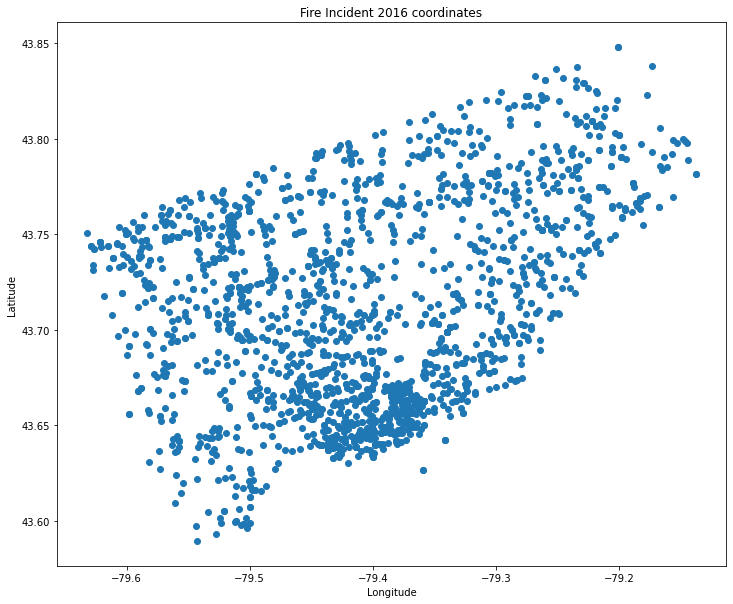

In [ ]:
#Plot the coordinates based on longitude and latitude of 2016 fire incidents
plt.figure(figsize=(12, 10))
plt.scatter(x=Incident2016_df.Longitude, y=Incident2016_df.Latitude)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Fire Incident 2016 coordinates")
plt.show()

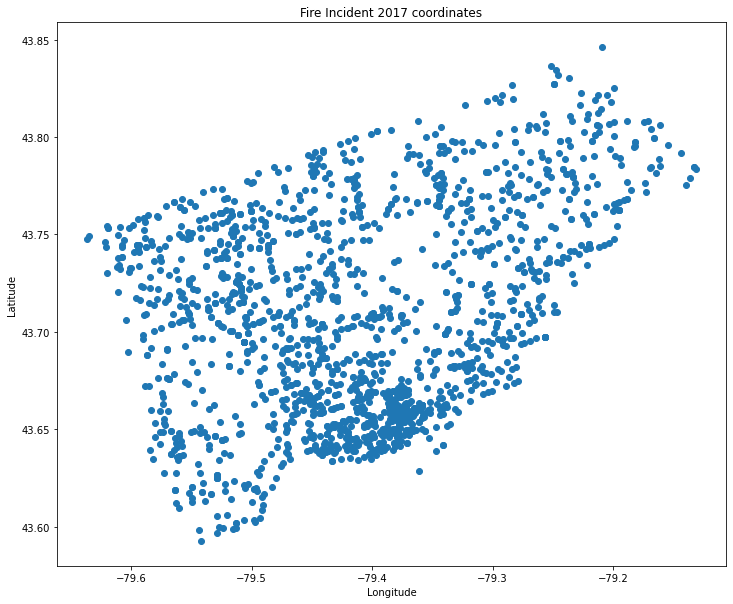

In [ ]:
#Plot the coordinates based on longitude and latitude of 2017 fire incidents
plt.figure(figsize=(12, 10))
plt.scatter(x=Incident2017_df.Longitude, y=Incident2017_df.Latitude)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Fire Incident 2017 coordinates")
plt.show()

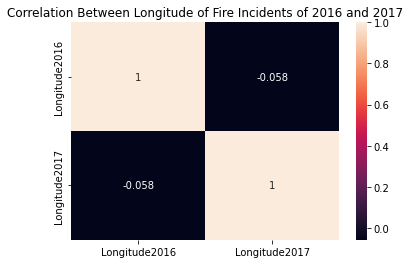

In [ ]:
#Show the Pearson-correlation between the longitudes of the two years
df_x_coordinate = pd.concat([Incident2016_df.Longitude,Incident2017_df.Longitude],axis=1)
df_x_coordinate.columns = ['Longitude2016','Longitude2017']
LongitudeCorr = df_x_coordinate.corr()
sns.heatmap(LongitudeCorr, annot = True)
plt.title('Correlation Between Longitude of Fire Incidents of 2016 and 2017')
plt.show()
#As the correlation coefficient between the longitudes of two years are way smaller than 0.5, 
#which shows they have weak correlations, which determines they are randomly generated

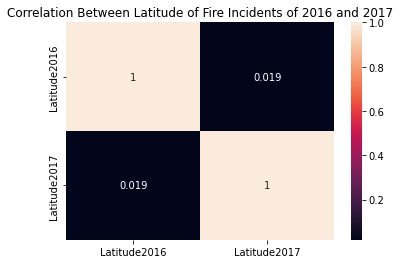

In [ ]:
df_y_coordinate = pd.concat([Incident2016_df.Latitude,Incident2017_df.Latitude],axis=1)
df_y_coordinate.columns = ['Latitude2016','Latitude2017']
LatitudeCorr = df_y_coordinate.corr()
sns.heatmap(LatitudeCorr, annot = True)
plt.title('Correlation Between Latitude of Fire Incidents of 2016 and 2017')
plt.show()
#As the correlation coefficient between the latitudes of two years are way smaller than 0.5, 
#which shows they have weak correlations, which determines they are randomly generated

# Optimization

In [ ]:
bij=pd.DataFrame(np.zeros((92, 84), dtype=int))

In [ ]:
fire_area_df = fire_area_df.reset_index(drop=True)
Station_df = Station_df.reset_index(drop=True)
for j, ctd in enumerate(fire_area_df.itertuples()):
  distance=inf
  bi=-1
  bj=-1
  for i, stt in enumerate(Station_df.itertuples()):
    if distance>haversineformula(getattr(ctd,'Longitude'),getattr(ctd,'Latitude'),getattr(stt,'Longitude'),getattr(stt,'Latitude')):
      distance=haversineformula(getattr(ctd,'Longitude'),getattr(ctd,'Latitude'),getattr(stt,'Longitude'),getattr(stt,'Latitude'))
      bi = i
      bj = j
  
  bij.iloc[bi, bj] = 1
  for i, stt in enumerate(Station_df.itertuples()):
    if 2>haversineformula(getattr(ctd,'Longitude'),getattr(ctd,'Latitude'),getattr(stt,'Longitude'),getattr(stt,'Latitude')):
      bij.iloc[i,j] = 1
bij

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# every centroid has at least 1 station
noStation=False
for i in range(len(bij.sum())):
  if bij.sum()[i]== 0:
    noStation=True
noStation

False

In [ ]:
Djk=pd.DataFrame(np.zeros((84, 366), dtype=float))
for j, incid in enumerate(centroid_incident2016_df.itertuples()):
  Djk.iloc[getattr(incid,'centroid'),getattr(incid,'TFS_Alarm_Time')]= getattr(incid,'Number_of_responding_apparatus')/10
Djk

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Djk.apply(np.ceil)
Djk=Djk.astype(int)

In [ ]:
# using data in 2016 for optimization
import cvxpy as cp
#variable and parameter definitions
x = cp.Variable((92, 84), integer=True)

#objective definition
obj = cp.Minimize(cp.sum(x))

# Define constraints
cons = []  # Initialize constraint list
for k in range(366):
  for j in range(84):
    cons.append( (cp.sum(cp.multiply(x, bij),axis=0))[j]>= Djk.iloc[j,k])
cons.append(x>=0)
prob = cp.Problem(obj,cons)
prob.solve()

158.0

In [ ]:
x_df=pd.DataFrame(x.value)
x_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
result=pd.DataFrame(x_df.sum(axis=1)).astype(int)
result

,0
0,3
1,1
2,1
3,2
4,4
...,...
87,0
88,0
89,2
90,0


In [ ]:
reduceNum=0
for i in range(92):
  if result.iloc[i,0] == 0:
    reduceNum+=1
reduceNum

24

In [ ]:
Djk2017=pd.DataFrame(np.zeros((84, 366), dtype=float))
for j, incid in enumerate(centroid_incident2017_df.itertuples()):
  Djk2017.iloc[getattr(incid,'centroid'),getattr(incid,'TFS_Alarm_Time')]= getattr(incid,'Number_of_responding_apparatus')/10
Djk2017.apply(np.ceil)
Djk2017=Djk2017.astype(int)

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2017.iloc[j,k]:
      unmet+=1
    if Djk2017.iloc[j,k]!=0:
      total+=1
score2017 =1 - unmet/total
score2017

0.9293598233995585

In [ ]:
Djk2018=pd.DataFrame(np.zeros((84, 366), dtype=float))
for j, incid in enumerate(centroid_incident2018_df.itertuples()):
  Djk2018.iloc[getattr(incid,'centroid'),getattr(incid,'TFS_Alarm_Time')]= getattr(incid,'Number_of_responding_apparatus')/10
Djk2018.apply(np.ceil)
Djk2018=Djk2018.astype(int)

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2018.iloc[j,k]:
      unmet+=1
    if Djk2018.iloc[j,k]!=0:
      total+=1
score2018 =1 - unmet/total
score2018

0.9124767225325885

In [ ]:
Djk2019=pd.DataFrame(np.zeros((84, 366), dtype=float))
for j, incid in enumerate(centroid_incident2019_df.itertuples()):
  Djk2019.iloc[getattr(incid,'centroid'),getattr(incid,'TFS_Alarm_Time')]= getattr(incid,'Number_of_responding_apparatus')/10
Djk2019.apply(np.ceil)
Djk2019=Djk2019.astype(int)

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2019.iloc[j,k]:
      unmet+=1
    if Djk2019.iloc[j,k]!=0:
      total+=1
score2019 =1 - unmet/total
score2019

0.9390243902439024

In [ ]:
(score2017+score2018+score2019)/3

0.9269536453920164

In [ ]:
for i in range(92):
  if result.iloc[i,0] == 0:
    result.iloc[i,0] += 1

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2017.iloc[j,k]:
      unmet+=1
    if Djk2017.iloc[j,k]!=0:
      total+=1
score2017new =1 - unmet/total
score2017new

0.9359823399558499

In [ ]:
score2017new-score2017

0.0066225165562914245

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2018.iloc[j,k]:
      unmet+=1
    if Djk2018.iloc[j,k]!=0:
      total+=1
score2018new =1 - unmet/total
score2018new

0.9292364990689013

In [ ]:
score2018new-score2018

0.016759776536312776

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2019.iloc[j,k]:
      unmet+=1
    if Djk2019.iloc[j,k]!=0:
      total+=1
score2019new =1 - unmet/total
score2019new

0.9634146341463414

In [ ]:
score2019new-score2019

0.024390243902439046

In [ ]:
(score2017new+score2018new+score2019new)/3

0.9428778243903642

In [ ]:
(score2017new-score2017+score2018new-score2018+score2019new-score2019)/3

0.01592417899834775

In [ ]:
# using data in 2016 and 2017 for optimization
Djk_new=pd.concat([Djk, Djk2017], axis=1)

#variable and parameter definitions
x = cp.Variable((92, 84), integer=True)

#objective definition
obj = cp.Minimize(cp.sum(x))

# Define constraints
cons = []  # Initialize constraint list
for k in range(366*2):
  for j in range(84):
    cons.append( (cp.sum(cp.multiply(x, bij),axis=0))[j]>= Djk_new.iloc[j,k])
cons.append(x>=0)
prob = cp.Problem(obj,cons)
prob.solve()

243.0

In [ ]:
x_df=pd.DataFrame(x.value)
result=pd.DataFrame(x_df.sum(axis=1)).astype(int)
result

,0
0,3
1,2
2,3
3,2
4,4
...,...
87,0
88,0
89,2
90,0


In [ ]:
reduceNum=0
for i in range(92):
  if result.iloc[i,0] == 0:
    reduceNum+=1
reduceNum

22

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2018.iloc[j,k]:
      unmet+=1
    if Djk2018.iloc[j,k]!=0:
      total+=1
score2018 =1 - unmet/total
score2018

0.9646182495344506

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2019.iloc[j,k]:
      unmet+=1
    if Djk2019.iloc[j,k]!=0:
      total+=1
score2019 =1 - unmet/total
score2019

0.9552845528455285

In [ ]:
(score2018+score2019)/2

0.9599514011899896

In [ ]:
# using data in 2016 and 2018 for optimization
Djk_new=pd.concat([Djk, Djk2018], axis=1)

#variable and parameter definitions
x = cp.Variable((92, 84), integer=True)

#objective definition
obj = cp.Minimize(cp.sum(x))

# Define constraints
cons = []  # Initialize constraint list
for k in range(366*2):
  for j in range(84):
    cons.append( (cp.sum(cp.multiply(x, bij),axis=0))[j]>= Djk_new.iloc[j,k])
cons.append(x>=0)
prob = cp.Problem(obj,cons)
prob.solve()

225.0

In [ ]:
x_df=pd.DataFrame(x.value)
result=pd.DataFrame(x_df.sum(axis=1)).astype(int)
result

,0
0,3
1,1
2,4
3,6
4,4
...,...
87,0
88,0
89,2
90,0


In [ ]:
reduceNum=0
for i in range(92):
  if result.iloc[i,0] == 0:
    reduceNum+=1
reduceNum

22

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2017.iloc[j,k]:
      unmet+=1
    if Djk2017.iloc[j,k]!=0:
      total+=1
score2017 =1 - unmet/total
score2017

0.9690949227373068

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2019.iloc[j,k]:
      unmet+=1
    if Djk2019.iloc[j,k]!=0:
      total+=1
score2019 =1 - unmet/total
score2019

0.967479674796748

In [ ]:
(score2017+score2019)/2

0.9682872987670275

In [ ]:
# using data in 2016 and 2019 for optimization
Djk_new=pd.concat([Djk, Djk2019], axis=1)

#variable and parameter definitions
x = cp.Variable((92, 84), integer=True)

#objective definition
obj = cp.Minimize(cp.sum(x))

# Define constraints
cons = []  # Initialize constraint list
for k in range(366*2):
  for j in range(84):
    cons.append( (cp.sum(cp.multiply(x, bij),axis=0))[j]>= Djk_new.iloc[j,k])
cons.append(x>=0)
prob = cp.Problem(obj,cons)
prob.solve()

219.0

In [ ]:
x_df=pd.DataFrame(x.value)
result=pd.DataFrame(x_df.sum(axis=1)).astype(int)
result

,0
0,3
1,1
2,1
3,4
4,4
...,...
87,0
88,0
89,2
90,0


In [ ]:
reduceNum=0
for i in range(92):
  if result.iloc[i,0] == 0:
    reduceNum+=1
reduceNum

23

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2017.iloc[j,k]:
      unmet+=1
    if Djk2017.iloc[j,k]!=0:
      total+=1
score2017 =1 - unmet/total
score2017

0.9426048565121413

In [ ]:
unmet=0
total=0
D_pre=pd.DataFrame(result.T@bij).T
for k in range(366):
  for j in range(84):
    if D_pre.iloc[j,0]< Djk2018.iloc[j,k]:
      unmet+=1
    if Djk2018.iloc[j,k]!=0:
      total+=1
score2018 =1 - unmet/total
score2018

0.9366852886405959

In [ ]:
(score2018+score2017)/2

0.9396450725763685